In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_all_data = pd.read_csv("C:/Users/domin/Desktop/Block B/2022-23b-1fcmgt-reg-ai-01-DominikSzewczyk224180/banijay_EDA/data/Usecase4.csv", compression = 'zip')

In [3]:
df_all_data.tail()

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0_x,date,hosts,id,length,start,end,title,...,public_metrics.like_count,public_metrics.quote_count,author.id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.name,author.username,engagement
3816012,4578969,1027737,2981,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_01,00:10:34,22:26:27,22:37:02,Op1 - De opening van woensdag 31 augustus,...,0.0,3.0,17022916,337078.0,1432.0,38840.0,2362.0,Op1,op1npo,0.005043
3816013,4578970,1027737,2981,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_01,00:10:34,22:26:27,22:37:02,Op1 - De opening van woensdag 31 augustus,...,0.0,0.0,17022916,337078.0,1432.0,38840.0,2362.0,Op1,op1npo,0.000890
3816014,4578971,1027737,2981,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_01,00:10:34,22:26:27,22:37:02,Op1 - De opening van woensdag 31 augustus,...,0.0,1.0,17022916,337078.0,1432.0,38840.0,2362.0,Op1,op1npo,0.002373
3816015,4578972,1027737,2981,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_01,00:10:34,22:26:27,22:37:02,Op1 - De opening van woensdag 31 augustus,...,1.0,2.0,17022916,337078.0,1432.0,38840.0,2362.0,Op1,op1npo,0.001780
3816016,4578973,1027737,2981,31-08-2022,"['Groenhuijsen, Charles', 'Napel, Carrie ten']",OP1__________-WON02340053_01,00:10:34,22:26:27,22:37:02,Op1 - De opening van woensdag 31 augustus,...,0.0,9.0,17022916,337078.0,1432.0,38840.0,2362.0,Op1,op1npo,0.026700


In [4]:
df_all_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0_x', 'date', 'hosts', 'id',
       'length', 'start', 'end', 'title', 'summary', 'keywords',
       'date_time_start', 'date_time_end', 'show_id', 'fragment',
       'Unnamed: 0_y', 'Datum', 'Time', 'Program', 'Station', 'Target Group',
       'Broadcast Type', 'Ratings Type', 'Kdh%', 'Kdh000', 'Zadl%',
       'date_time', 'content_id', 'date_start', 'date_end',
       'referenced_tweets', 'possibly_sensitive', 'lang', 'text',
       'edit_history_tweet_ids', 'author_id', 'created_at',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count', 'author.id',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count',
       'author.public_metrics.listed_count', 'author.name', 'author.username',
       'engagement'],
      dtype='object')

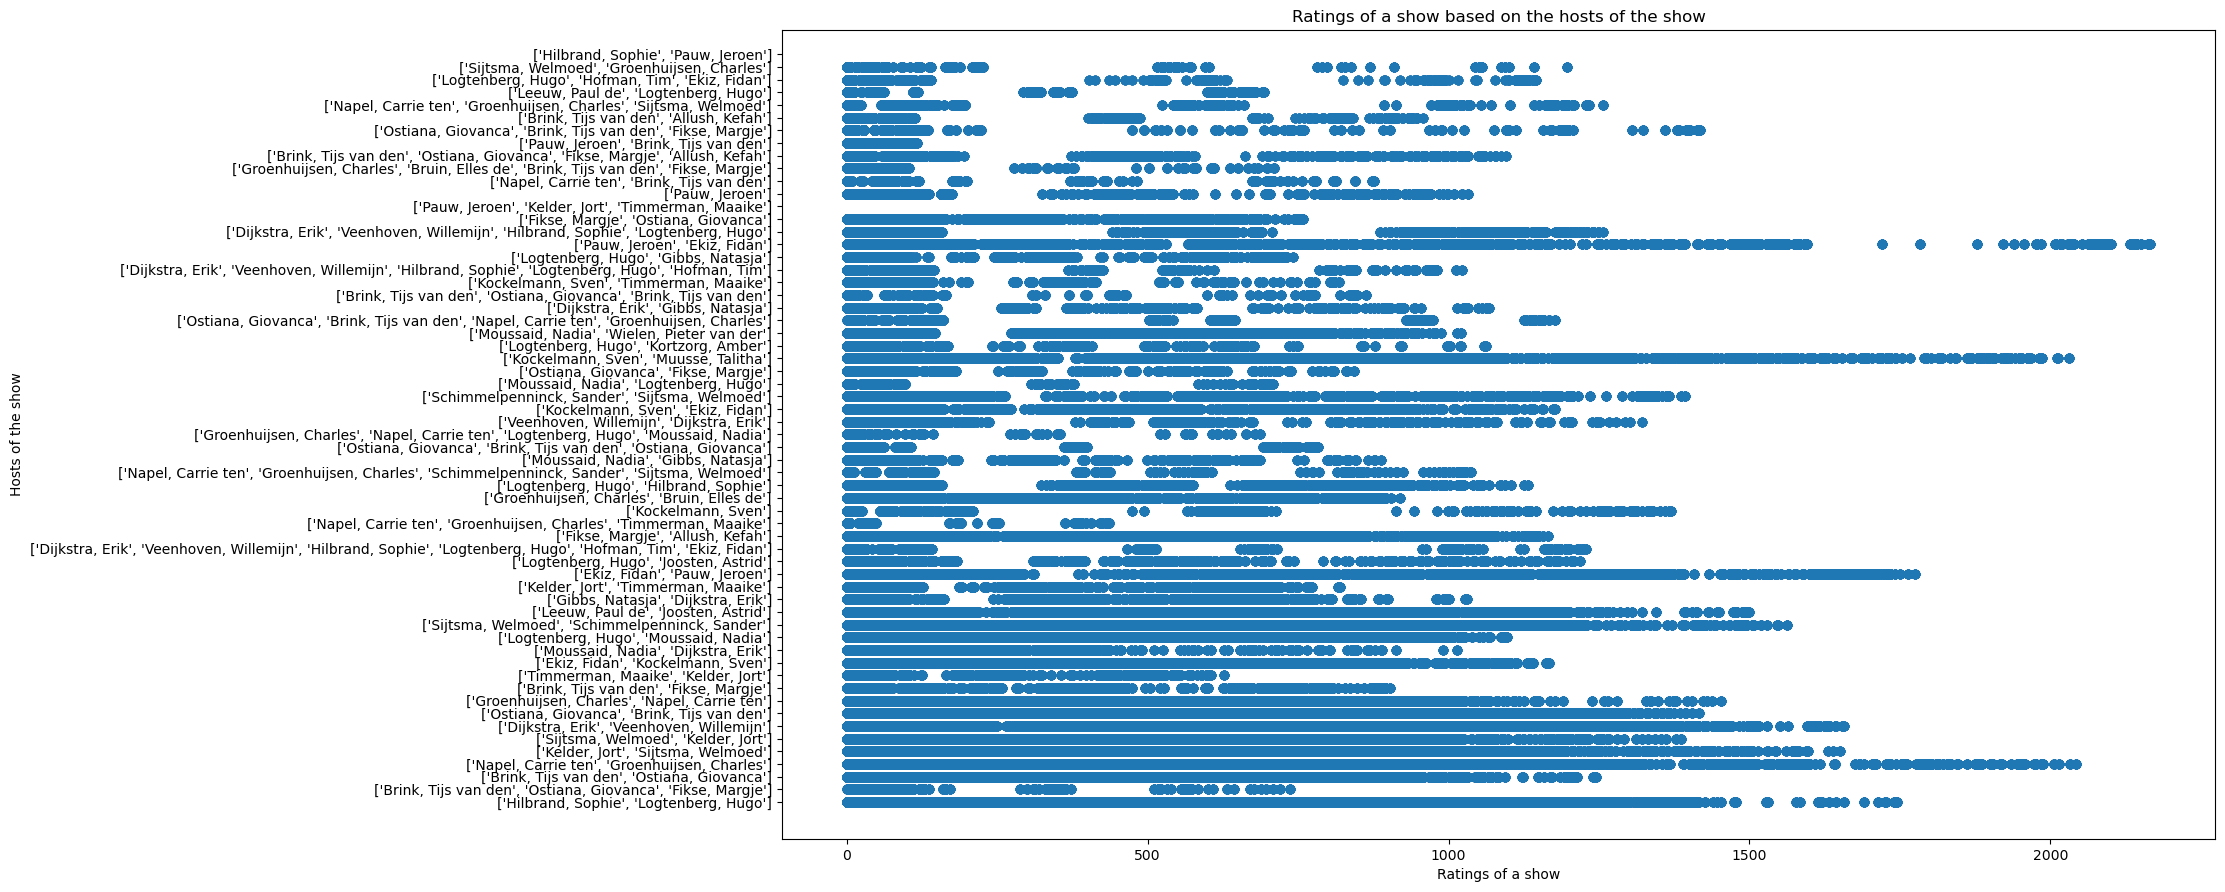

In [5]:
fig, ax = plt.subplots()
plt.scatter(x = "Kdh000", y = "hosts", data = df_all_data)
ax.set_xlabel("Ratings of a show")
ax.set_ylabel("Hosts of the show")
ax.set_title("Ratings of a show based on the hosts of the show")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Ratings of a show based on the hosts of the show.png', dpi=100)

# For this Target Group, can we predict the ratings of a show based on the content of the show and twitter metrics?

In [6]:
df_all_data = df_all_data[df_all_data['Kdh000'].notna()]

In [7]:
xarray = np.array(df_all_data[["Target Group"]])

In [8]:
xarray = xarray.reshape((3815860, 1))

In [9]:
yarray = np.array(df_all_data[["Kdh000"]])

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
# create the encoder object
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(xarray)
y = yarray
# create your model object
model = LinearRegression()
#fit the model using the encoded input.
model.fit(X_transform, y)
predictions = model.predict(X_transform)



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


In [12]:
reg_all.score(X_test, y_test)

0.5438235488970673

In [13]:
y_pred.shape

(1144758, 1)

In [14]:
y_test.shape

(1144758, 1)

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)


201.15742636294277

In [16]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X_transform, y, cv=kf)


In [17]:
print(cv_results)

[0.54407644 0.54322079 0.54304786 0.54387356 0.54408979 0.54442103]


In [18]:
print(np.mean(cv_results), np.std(cv_results))

0.5437882432821574 0.0004919125922898988


In [19]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.54306947 0.54437962]


In [20]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
        ridge = Ridge(alpha=alpha)    
        ridge.fit(X_train, y_train)    
        y_pred = ridge.predict(X_test)    
        scores.append(ridge.score(X_test, y_test))
print(scores)

[0.543823593108508, 0.5438235903624922, 0.5438235622296932, 0.5438232136884047, 0.543813057175689]


In [21]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
        lasso = Lasso(alpha=alpha)    
        lasso.fit(X_train, y_train)    
        y_pred = lasso.predict(X_test)    
        scores.append(lasso.score(X_test, y_test))
print(scores)

c:\Users\domin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+09, tolerance: 2.364e+07
  model = cd_fast.enet_coordinate_descent(


[0.5438234078278417, 0.5427976058277522, 0.4642854298728434, 0.2996725740013009, -3.178253425106803e-06]


Predictions based on likes on twitter

In [55]:
X = np.array(df_all_data[["public_metrics.like_count"]])

In [56]:
y = np.array(df_all_data[["Kdh000"]])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [58]:
reg_all.score(X_test, y_test)

4.618040126203038e-05

# linear regression

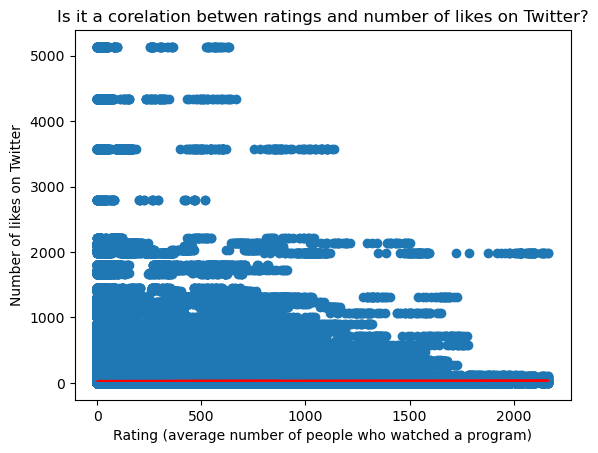

In [77]:
fig, ax = plt.subplots()
X = df_all_data.iloc[:,25].values.reshape(-1,1)
y = df_all_data.iloc[:,40].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred, color = "red")
ax.set_xlabel("Rating (average number of people who watched a program)")
ax.set_ylabel("Number of likes on Twitter")
ax.set_title("Is it a corelation betwen ratings and number of likes on Twitter?")
plt.show()

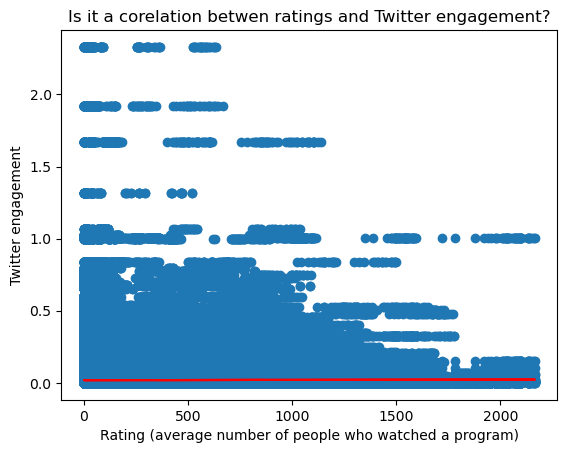

In [78]:
fig, ax = plt.subplots()
X = df_all_data.iloc[:,25].values.reshape(-1,1)
y = df_all_data.iloc[:,49].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred, color = "red")
plt.plot(X,y_pred, color = "red")
ax.set_xlabel("Rating (average number of people who watched a program)")
ax.set_ylabel("Twitter engagement")
ax.set_title("Is it a corelation betwen ratings and Twitter engagement?")
plt.show()

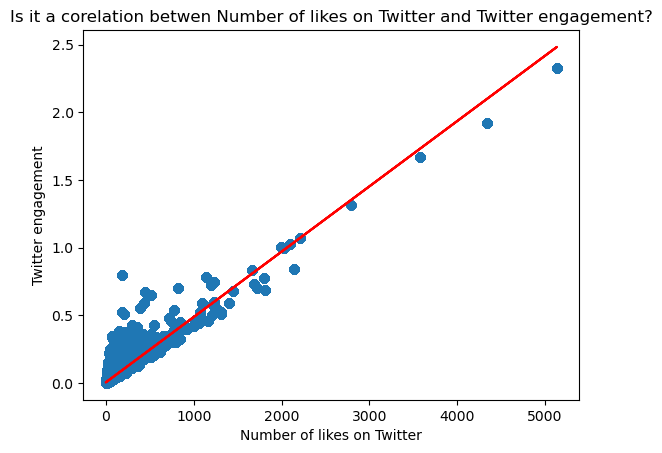

In [80]:
fig, ax = plt.subplots()
X = df_all_data.iloc[:,40].values.reshape(-1,1)
y = df_all_data.iloc[:,49].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred, color = "red")
plt.plot(X,y_pred, color = "red")
ax.set_xlabel("Number of likes on Twitter")
ax.set_ylabel("Twitter engagement")
ax.set_title("Is it a corelation betwen Number of likes on Twitter and Twitter engagement?")
plt.show()